In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the data
data=pd.read_excel('Data_Train.xlsx')

In [3]:
#seeing the data
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#Making instance of data
df=data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
#Checking for missing values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is only one missing value in Route and Total_stops each, so let us drop them

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(10682, 11)

We can see only one row removed.

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Exploring the columns

In [10]:
df['Airline'].nunique()

12

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

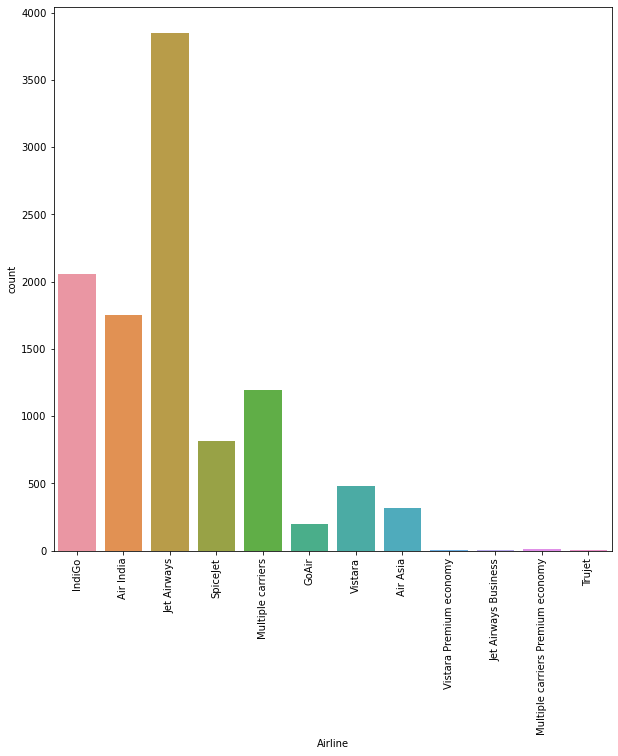

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(df['Airline'])
print(df['Airline'].value_counts())
plt.xticks(rotation=90)

In [12]:
df['Date_of_Journey'].nunique()

44

Our data has 44 different dates

In [13]:
df['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [14]:
import datetime as dt

In [15]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

converted the datetime 

In [16]:
df['Date_of_Journey']

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10682, dtype: datetime64[ns]

Now the date is in format of yyyy-mm-dd, let us split them individually

In [19]:
df['journey_year']=pd.to_datetime(df['Date_of_Journey']).dt.year

In [20]:
df['journey_year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: journey_year, Length: 10682, dtype: int64

now we splitted the year into new column

In [27]:
df['journey_date']=pd.to_datetime(df['Date_of_Journey']).dt.day

In [28]:
df['journey_date']

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: journey_date, Length: 10682, dtype: int64

now we spitted the day into new column

In [25]:
df['journey_month']=pd.to_datetime(df['Date_of_Journey']).dt.month

In [26]:
df['journey_month']

0         3
1         1
2         9
3        12
4         1
         ..
10678     9
10679     4
10680     4
10681     1
10682     9
Name: journey_month, Length: 10682, dtype: int64

now we spitted the month into new column

let us drop the column date of journey

In [32]:
df.drop(['Date_of_Journey'],axis=1, inplace=True)

we dropped the column date of journey

In [33]:
df['journey_year'].value_counts()

2019    10682
Name: journey_year, dtype: int64

since there is only 1 year, we can drop this column also

In [34]:
df.drop(['journey_year'],axis=1, inplace=True)

dropped the column journey year

In [29]:
df['Duration'].nunique()

368

we have 368 unique vqlues in duration

In [30]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
35h 20m      1
32h 55m      1
35h 35m      1
47h 40m      1
30h 10m      1
Name: Duration, Length: 368, dtype: int64

Now let us convert these into minutes

In [75]:
#Making the instance of duration column
y=pd.DataFrame({})
y[['hours','minutes']]=df['Duration'].str.split(' ', expand=True)

In [76]:
y

,hours,minutes
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10679,2h,35m
10680,3h,None
10681,2h,40m
10682,8h,20m


In [77]:
y['hours'].value_counts()

2h     2403
1h      621
3h      501
7h      487
5h      481
9h      445
12h     428
8h      424
13h     407
11h     365
10h     355
6h      340
14h     337
15h     268
23h     264
26h     241
16h     234
4h      222
22h     218
24h     197
21h     196
25h     186
27h     179
20h     162
18h     141
19h     134
17h     129
28h      94
29h      65
30h      49
38h      34
37h      17
33h      13
32h       9
34h       8
36h       7
35h       7
31h       6
42h       2
47h       2
39h       2
40h       1
41h       1
5m        1
Name: hours, dtype: int64

we can see there is one value 5m.. it might be wrong entry, we will change that m to h or drop the row. We will lookm the row and decide

In [79]:
b=np.where(df['Duration']=='5m')
b

(array([6474], dtype=int64),)

In [82]:
print(df.iloc[6474,:])

Airline                        Air India
Source                            Mumbai
Destination                    Hyderabad
Route              BOM → GOI → PNQ → HYD
Duration                              5m
Total_Stops                      2 stops
Additional_Info                  No info
Price                              17327
journey_date                           3
journey_month                          6
dep_hour                              16
dep_min                               50
arrival_hour                          16
arrival_minutes                       55
Name: 6474, dtype: object


we can see it has 2 stops and journey is from Mumbai to Hyderabad , which is not possible in 5minutes, it is awrong entry. So we replace m with h

In [88]:
y['hours']=y['hours'].str.replace('5m','5h')

now we replaced m with h

In [89]:
y.iloc[6474]

hours        5h
minutes    None
Name: 6474, dtype: object

In [90]:
#Now let us remove the character h and convert it to int
y['hours']=y['hours'].str.replace('h','').astype('int')

In [91]:
y['hours'].dtype

dtype('int32')

now we changed that into int format also and verified

In [92]:
#Converting into minutes
y['hours_in_min']=y['hours']*60

In [93]:
y['hours_in_min']

0         120
1         420
2        1140
3         300
4         240
         ... 
10679     120
10680     180
10681     120
10682     480
hours     120
Name: hours_in_min, Length: 10683, dtype: int32

converted hoirs into minutes

In [97]:
#Fill none 
y['minutes']=y['minutes'].fillna('0m')
#Let us replace m also and convert into int in minutes column
y['minutes']=y['minutes'].str.replace('m','').astype('int')

In [98]:
y['minutes'].dtype

dtype('int32')

Now it is converted into integer

Now we need to add the hours_min and minutes column to new column i.e tot. duration in min.

In [100]:
y['tot_duration']=y['hours_in_min']+y['minutes']
y['tot_duration']

0         170
1         445
2        1140
3         325
4         285
         ... 
10679     155
10680     180
10681     160
10682     500
hours     170
Name: tot_duration, Length: 10683, dtype: int32

let us add this column into original data and remove the column duration

In [101]:
df['duration_minutes']=y['tot_duration']

In [102]:
#Dropping the duration column
df.drop(['Duration'],axis=1, inplace=True)

Now the duration column is dropped

In [35]:
#Extracting the hour and minute from the column dep time
df['dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour

df['dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

#Dropping the column dep time
df.drop(['Dep_Time'], axis=1, inplace=True)

In [37]:
#Extracting details from arrival time
df['arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

df['arrival_minutes']=pd.to_datetime(df['Arrival_Time']).dt.minute

#Dropping the original column
df.drop(['Arrival_Time'],axis=1, inplace=True)


We now extracted and dropped the column

In [104]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_date,journey_month,dep_hour,dep_min,arrival_hour,arrival_minutes,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,285


In [105]:
df.shape

(10682, 14)

Now there are 14 columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

<Figure size 1296x1296 with 0 Axes>

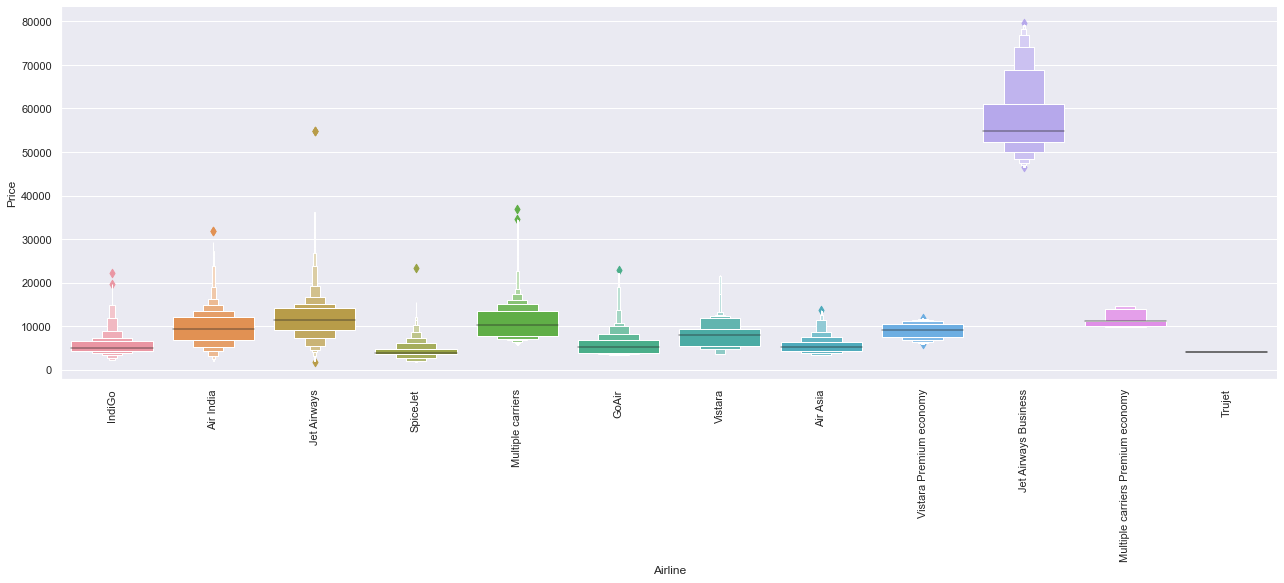

In [115]:
#Explore this column wrt to price
sns.set()
plt.figure(figsize=(18,18))
sns.catplot(x='Airline', y='Price',data=df,kind='boxen', height=6,aspect=3)
plt.xticks(rotation=90)

we can see that Jet airways has the highest cost.

In [116]:
#Label encoding the column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])

In [117]:
df['Airline']

0         3
1         1
2         4
3         3
4         3
         ..
10678     0
10679     1
10680     4
10681    10
10682     1
Name: Airline, Length: 10682, dtype: int32

Now we encoded them

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

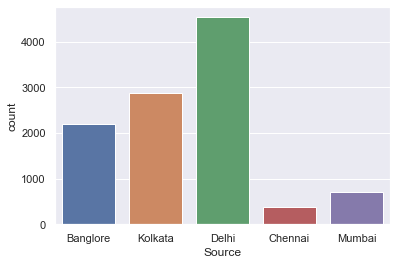

In [118]:
#Let us check and encode the source column simillarly
sns.countplot(df['Source'])
df['Source'].value_counts()

In our data majority of flights source is from delhi, Kolkata

In [119]:
#Encoding these
df['Source']=le.fit_transform(df['Source'])

In [120]:
#Exploring destination column
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [121]:
#Encoding the column
df['Destination']=le.fit_transform(df['Destination'])


In [122]:
df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → BLR → CCU → BBI → HYD       1
CCU → IXB → DEL → BLR             1
BOM → BBI → HYD                   1
BOM → COK → MAA → HYD             1
BOM → UDR → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

In [125]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

both these columns convey the same info, so let us drop the column route

In [127]:
df.drop(['Route'],axis=1,inplace=True)

In [129]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'journey_date', 'journey_month', 'dep_hour', 'dep_min',
       'arrival_hour', 'arrival_minutes', 'duration_minutes'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

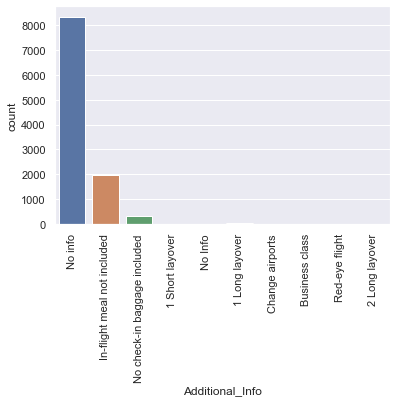

In [132]:
df['Additional_Info'].value_counts()
sns.countplot(df['Additional_Info'])
plt.xticks(rotation=90)

There is no infromation available , so let us drop the column

In [133]:
df.drop(['Additional_Info'],axis=1,inplace=True)

In [135]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [136]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3, '4 stops':4}, inplace=True)

we encoded the total stops

In [137]:
df['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

Now all the data encoded and in numerical format

In [138]:
#Let us see the correlation
df.corr()

,Airline,Source,Destination,Total_Stops,Price,journey_date,journey_month,dep_hour,dep_min,arrival_hour,arrival_minutes,duration_minutes
Airline,1.000000,-0.013397,0.018446,-0.199396,-0.039565,0.031118,-0.007900,-0.035269,-0.059922,-0.007567,-0.071092,-0.159728
Source,-0.013397,1.000000,-0.592576,0.192840,0.015999,0.007563,0.063052,0.059047,-0.056998,0.025635,0.021040,0.161989
Destination,0.018446,-0.592576,1.000000,-0.295476,-0.071122,-0.052102,-0.105035,-0.072997,0.127931,-0.039729,0.017196,-0.257308
Total_Stops,-0.199396,0.192840,-0.295476,1.000000,0.603897,-0.024136,0.065495,-0.061476,-0.002618,0.038140,-0.106940,0.738204
Price,-0.039565,0.015999,-0.071122,0.603897,1.000000,-0.165448,0.010705,0.006799,-0.024458,0.024244,-0.086155,0.506604
journey_date,0.031118,0.007563,-0.052102,-0.024136,-0.165448,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.038422
journey_month,-0.007900,0.063052,-0.105035,0.065495,0.010705,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055147
dep_hour,-0.035269,0.059047,-0.072997,-0.061476,0.006799,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002122
dep_min,-0.059922,-0.056998,0.127931,-0.002618,-0.024458,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.019025
arrival_hour,-0.007567,0.025635,-0.039729,0.038140,0.024244,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.051555


In [141]:
#Brief stats
df.describe()

,Airline,Source,Destination,Total_Stops,Price,journey_date,journey_month,dep_hour,dep_min,arrival_hour,arrival_minutes,duration_minutes
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,0.824190,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,643.048118
std,2.352090,1.177276,1.474845,0.675229,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,507.803454
min,0.000000,0.000000,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,75.000000
25%,3.000000,2.000000,0.000000,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,170.000000
50%,4.000000,2.000000,1.000000,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,520.000000
75%,4.000000,3.000000,2.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,930.000000
max,11.000000,4.000000,5.000000,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,2860.000000


Observations:
    Mean > Median : price, it is right skewed
    We can see huge diference in 75% and max. in journey_month, dep. hour

we are having data of categorical, so we don't perform checking the skewness etc..or removing outliers.

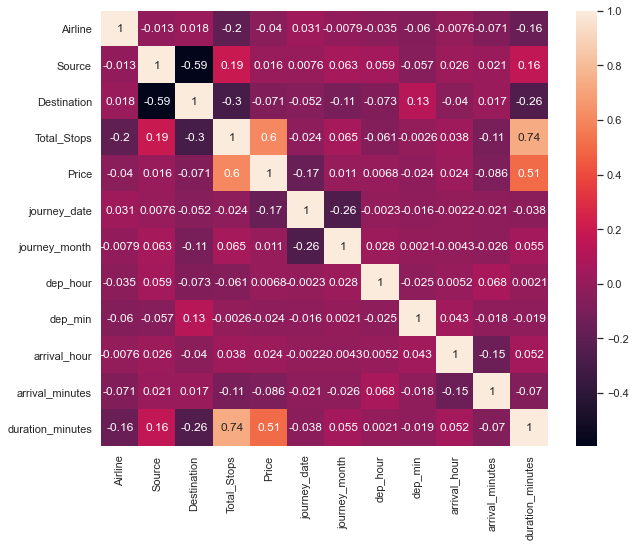

In [140]:
#Visualise the relation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)


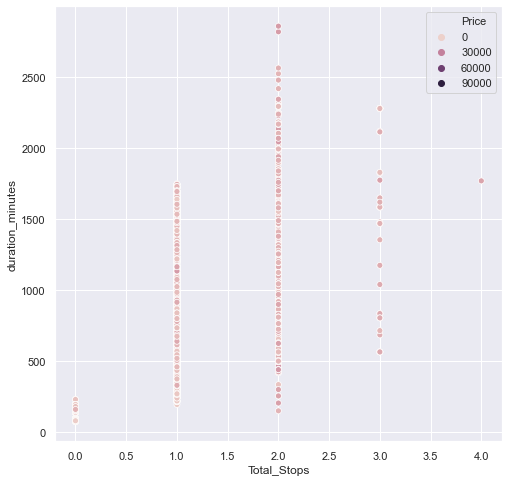

In [147]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Total_Stops',y='duration_minutes', data=df, hue='Price')

with increase in stops duration is also more and price too. 

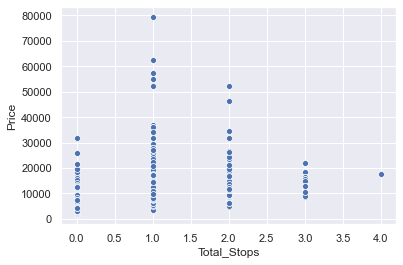

In [148]:
sns.scatterplot(x='Total_Stops',y='Price',data=df)

we can see with increase in stops, starting price is also increased,but max. price is there for 1 stop

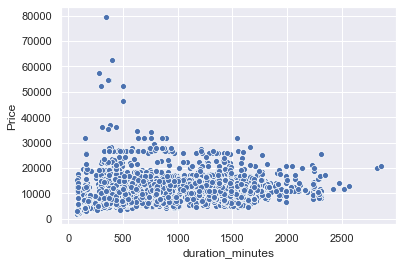

In [150]:
sns.scatterplot(x='duration_minutes',y='Price',data=df)

with increase in time price also increasing , slightly related

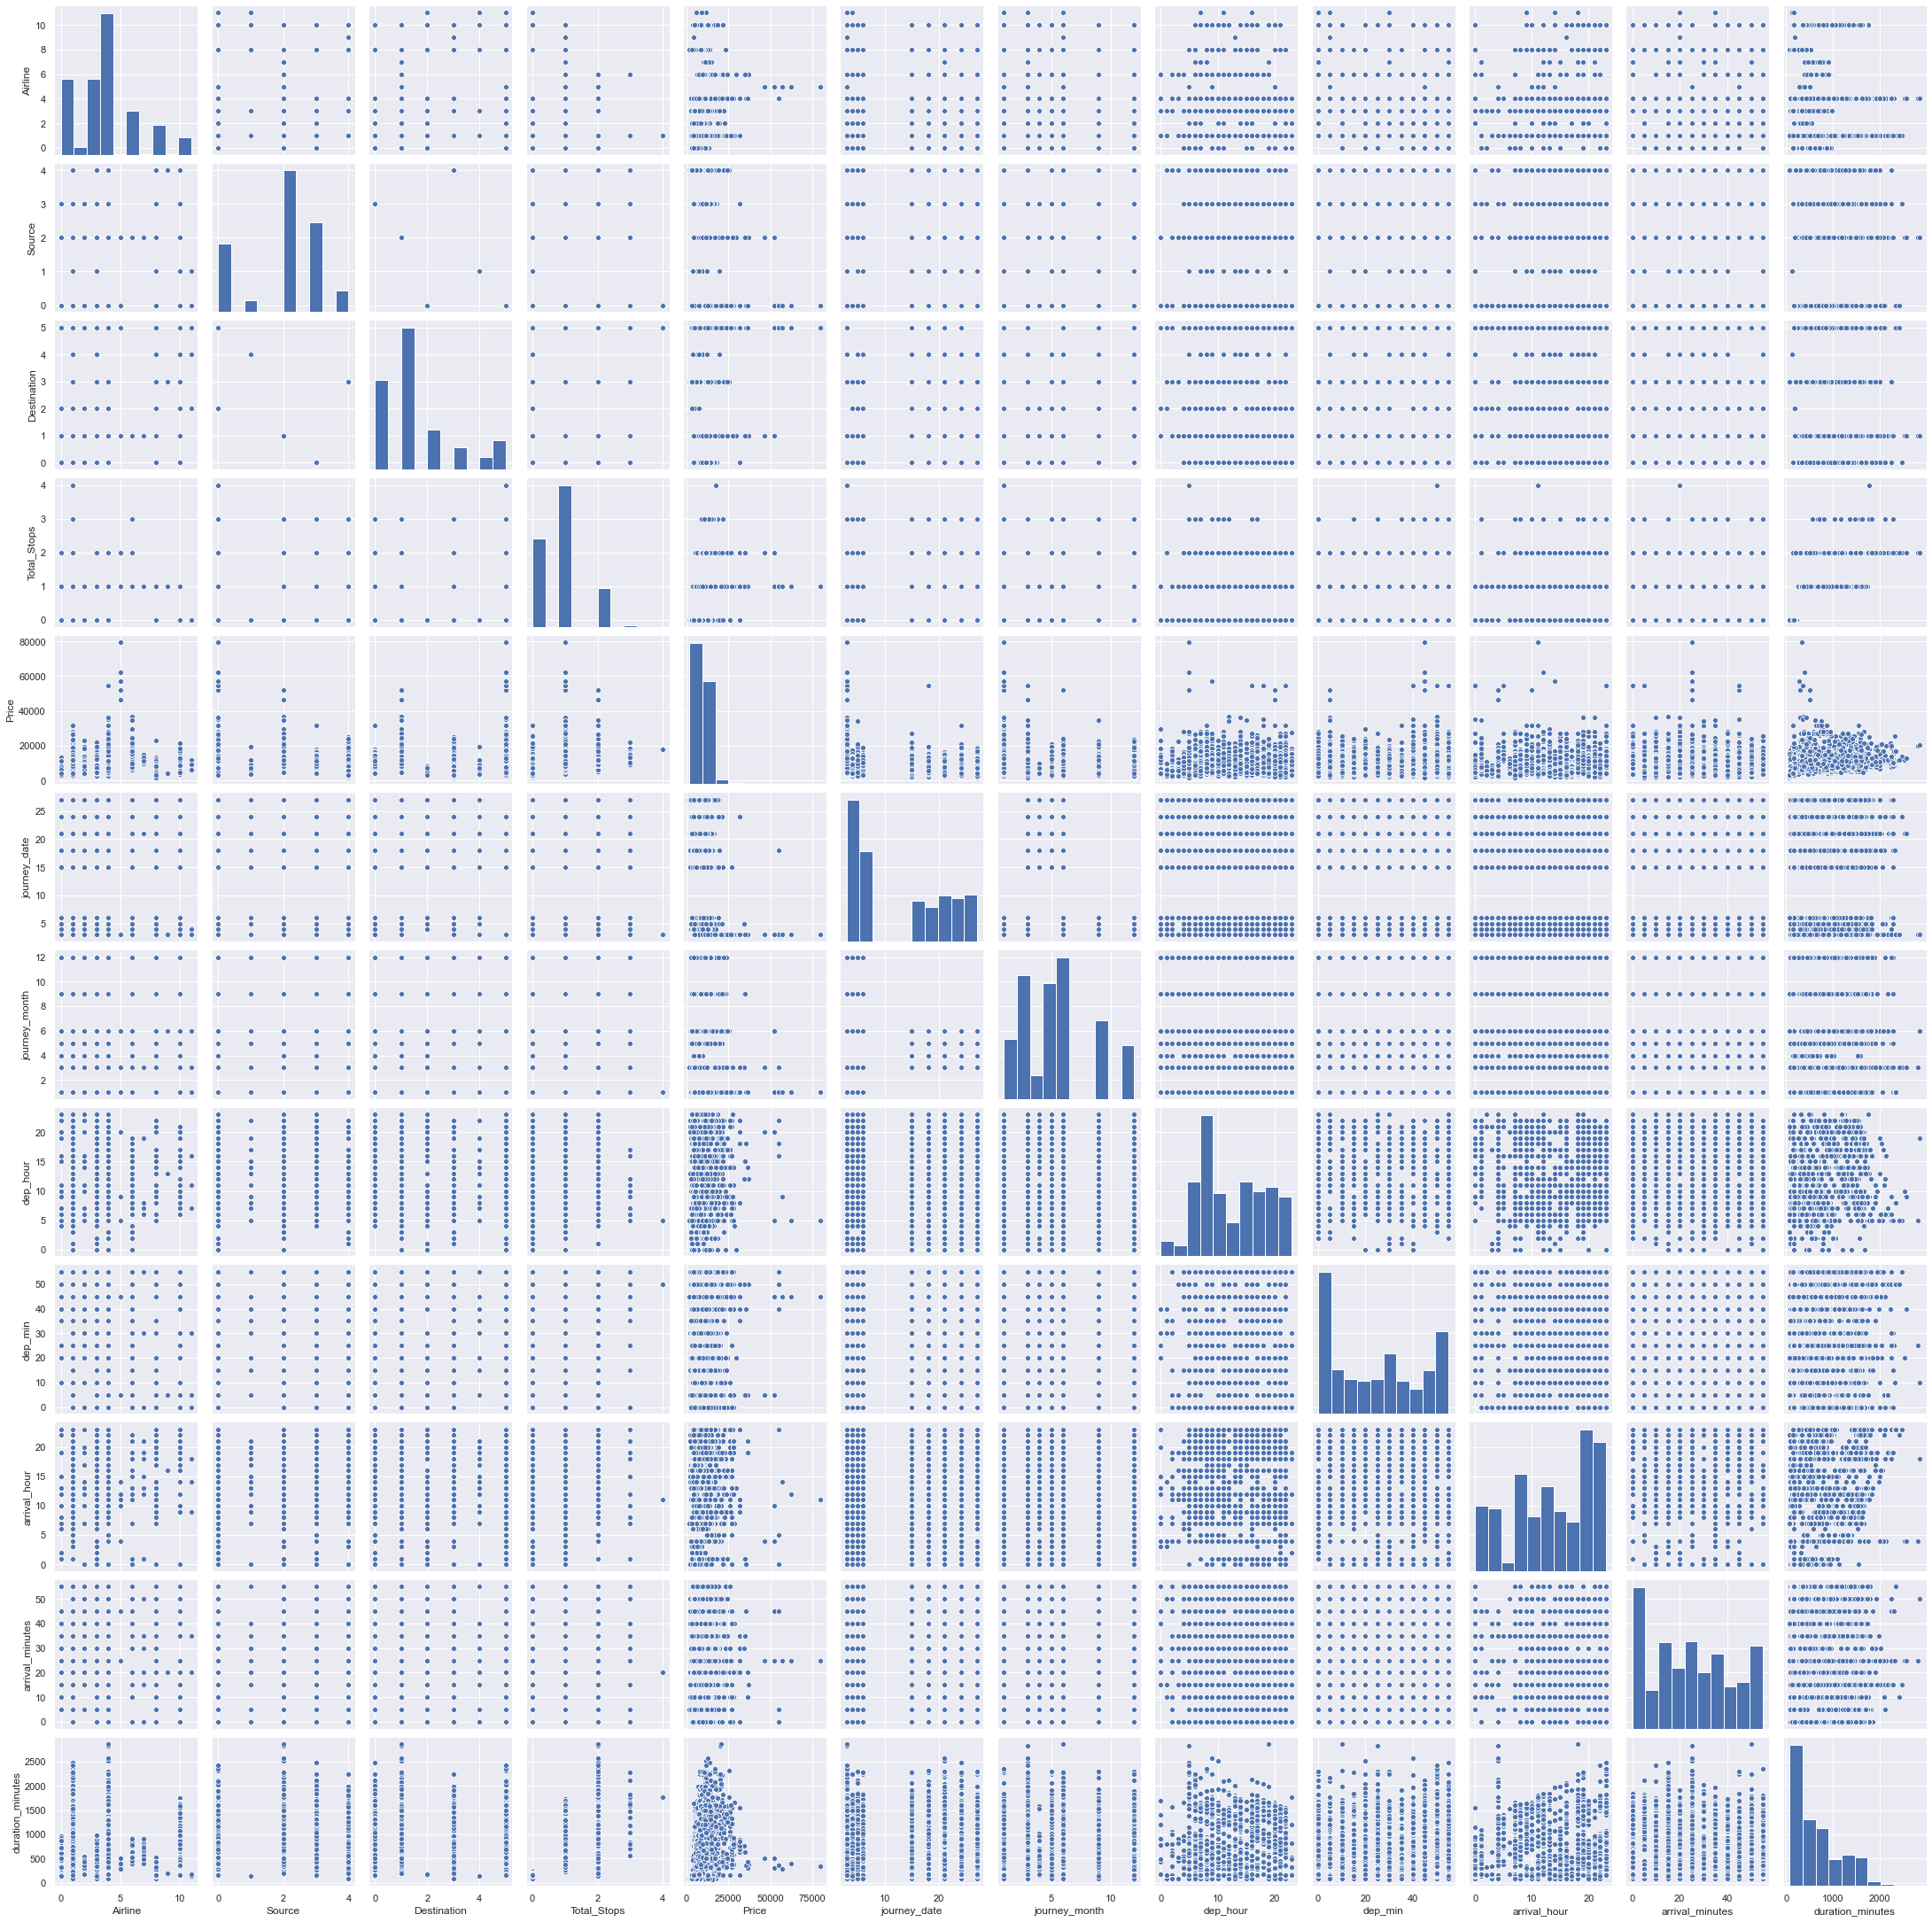

In [151]:
sns.pairplot(df)

We can see the relation and trends through above graphs between each column

In [154]:
#Let us split the data into x and y
x=df.drop('Price',axis=1)
y=df['Price']

now we splitted data into x and y

In [156]:
x.shape

(10682, 11)

In [157]:
y.shape

(10682,)

In [159]:
#Since there are hours , mins, etc and other details.. we will scale the dataset x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

now the data is scaled

In [158]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

## Test data

let us load the test dataset

In [152]:
test_data=pd.read_excel('Test_set.xlsx')

In [153]:
#Let us see the test data
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


There 2671 rows and 10 columns, price column is not present

In [160]:
#Let us check the test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


all the columns are object type

In [161]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no null values

In [162]:
#let us drop route and additional info columns
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [163]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

we have details as simillar in train set

In [164]:
test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3, '4 stops':4}, inplace=True)

now we replaced them

In [165]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [166]:
#Encoding the data
test_data['Airline']=le.fit_transform(test_data['Airline'])

In [167]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

In [168]:
#Encoding the columns
test_data['Source']=le.fit_transform(test_data['Source'])

test_data['Destination']=le.fit_transform(test_data['Destination'])

In [169]:
#Date of journey column
test_data['journey_date']=pd.to_datetime(test_data['Date_of_Journey']).dt.day

test_data['journey_month']=pd.to_datetime(test_data['Date_of_Journey']).dt.month

#Drop the original column 
test_data.drop('Date_of_Journey',axis=1,inplace=True)

In [171]:
#Extracting the hour and minute from the column dep time
test_data['dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour

test_data['dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute

#Dropping the column dep time
test_data.drop(['Dep_Time'], axis=1, inplace=True)

In [172]:
#Extracting the hour and minute from the column arrival time
test_data['arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour

test_data['arrival_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute

#Dropping the column arrival time
test_data.drop(['Arrival_Time'], axis=1, inplace=True)

In [173]:
test_data['Duration']

0       10h 55m
1            4h
2       23h 45m
3           13h
4        2h 50m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 2671, dtype: object

In [178]:
c=pd.DataFrame({})
c[['hours','minutes']]=test_data['Duration'].str.split(' ', expand=True)
c['hours']=c['hours'].str.replace('5m','5h')

c['hours']=c['hours'].str.replace('h','').astype('int')

#Converting into minutes
c['hours_in_min']=c['hours']*60

#Fill none 
c['minutes']=c['minutes'].fillna('0m')
#Let us replace m also and convert into int in minutes column
c['minutes']=c['minutes'].str.replace('m','').astype('int')

c['tot_duration']=c['hours_in_min']+c['minutes']
c['tot_duration']

0        655
1        240
2       1425
3        780
4        170
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: tot_duration, Length: 2671, dtype: int32

In [179]:
test_data['duration_minutes']=c['tot_duration']
test_data['duration_minutes']

0        655
1        240
2       1425
3        780
4        170
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: duration_minutes, Length: 2671, dtype: int32

In [180]:
#drop the duration column
test_data.drop(['Duration'],axis=1,inplace=True)

In [181]:
test_data.head()

,Airline,Source,Destination,Total_Stops,journey_date,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,duration_minutes
0,4,2,1,1,6,6,17,30,4,25,655
1,3,3,0,1,5,12,6,20,10,20,240
2,4,2,1,1,21,5,19,15,19,0,1425
3,6,2,1,1,21,5,8,0,21,0,780
4,0,0,2,0,24,6,23,55,2,45,170


In [183]:
#Scaling the test data
test_data=sc.fit_transform(test_data)

all set , let us train the model 

In [190]:
#Finding the best random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
r2=0
rs=0
sc=0
lr=LinearRegression()
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    pred=lr.predict(x_test)
    r2s=r2_score(y_test,pred)
    if r2s>r2:
        r2=r2s
        rs=i
        sc=score
print(f'Best r2 socre: {r2} \nat random state {rs}\n score is {sc}')
    
    

Best r2 socre: 0.4883993764474447 
at random state 879
 score is 0.40715692995582564


Best random state is at 879, let us split at that .

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=879)

In [192]:
#Importing diferent models to predict
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,KFold

In [195]:
models=[LinearRegression(),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'r2 score of {m}:', r2_score(y_test,predm))
    cvscore=cross_val_score(m,x_scaled,y, cv=5)
    print(f'mean cv score of {m}:',cvscore.mean())
    print('\n')
    

r2 score of LinearRegression(): 0.4883993764474447
mean cv score of LinearRegression(): 0.42464167864295577


r2 score of SVR(): 0.05083276979441498
mean cv score of SVR(): 0.0380376493237218


r2 score of DecisionTreeRegressor(): 0.5968881993969379
mean cv score of DecisionTreeRegressor(): 0.6546637912930101


r2 score of RandomForestRegressor(): 0.7890887395015345
mean cv score of RandomForestRegressor(): 0.7873554217816956


r2 score of GradientBoostingRegressor(): 0.7840724699669273
mean cv score of GradientBoostingRegressor(): 0.7772588144289732




From above we can see Random forest has the least difference between cv score and r2 score. So let us select it as the best model
and perform tuning to improve accuracy

In [205]:
#Hyper parameter tuning of Ridge regression
from sklearn.model_selection import GridSearchCV

par={'n_estimators':range(10,50,5),'max_depth':range(0,10,2),'min_samples_split':range(2,20,2),
     'min_samples_leaf':range(1,10)}

grid=GridSearchCV(RandomForestRegressor(),param_grid=par,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)
print("Best score:",grid.best_score_)
print("Best estimator:",grid.best_estimator_)
print("Best parameters:",grid.best_params_)

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits
[CV] END max_depth=0, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=0, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=0, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=0, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=0, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=0, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=0, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=0, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=0, min_samples_leaf=1, min_samples_split=2, n_estimators=15; total time=   0.0s
[CV] END max_depth=0, min_samples_leaf=1, m

C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3240 fits failed out of a total of 16200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 441, in fit
    trees = Parallel(
  File "C:\Users\Lucky Girish\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\L

Best score: 0.7733032112839601
Best estimator: RandomForestRegressor(max_depth=8, n_estimators=25)
Best parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}


We can see with increase in depth and n estimators accuracy increased. So let us try to improve more by trying other values.

In [218]:
ms=0
r2s=0
rs=0
for i in range(100,1000,100):
    rf=RandomForestRegressor(max_depth=10, n_estimators=100,min_samples_leaf=1,min_samples_split=2,random_state=i)
    rf.fit(x_train,y_train)
    prediction=rf.predict(x_test)
    r2=r2_score(y_test,prediction)
    mse=mean_squared_error(y_test,prediction)
    if r2>r2s:
        r2s=r2
        rs=i
        ms=mse
print(f"R2 score: {r2}\n mean squared erroer is: {mse} at random state: {i}")

R2 score: 0.8172335276089704
 mean squared erroer is: 3452316.5946568726 at random state: 900


Now r2 score increased to 82

In [227]:
rf_final=RandomForestRegressor(max_depth=10, n_estimators=100,min_samples_leaf=1,min_samples_split=2,random_state=900)
rf_final.fit(x_train,y_train)
prediction=rf.predict(x_test)
r2=r2_score(y_test,prediction)
mse=mean_squared_error(y_test,prediction)

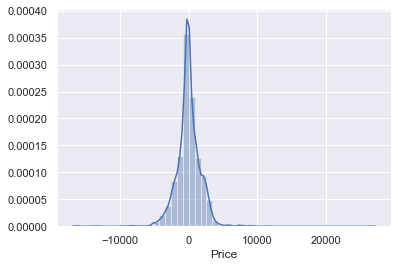

In [222]:
sns.distplot(y_test-prediction)

we can see it is normally distibuted

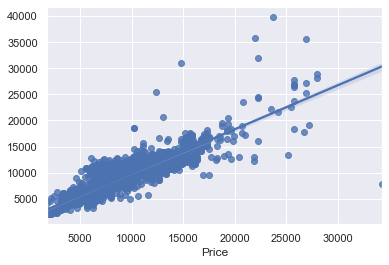

In [221]:
sns.regplot(y_test,prediction)

Almost in range. 

In [228]:
#saving the model
import pickle
file=open('Flight_fare.pkl','wb')
pickle.dump(rf_final,file)